In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

import os
from dotenv import load_dotenv # add this line

import json

from scipy import stats

In [2]:
# Python program to read
# json file
 
import json
 
# Opening JSON file
f = open("real_lakes_change_perception_experiment_results.json")
 
# returns JSON object as 
# a dictionary
data = json.load(f)

f.close()

In [3]:
exp_df = pd.DataFrame(list(data))
exp_df = pd.concat([exp_df.drop(['data'], axis=1), exp_df['data'].apply(pd.Series)], axis=1)
exp_df = pd.concat([exp_df.drop(['trials'], axis=1), exp_df['trials'].apply(pd.Series)], axis=1)

In [4]:
exp_df = exp_df[[3, 5, 6]]

exp_df = pd.concat([exp_df.drop([3], axis=1), exp_df[3].apply(pd.Series)], axis=1)
exp_df = pd.concat([exp_df.drop([6], axis=1), exp_df[6].apply(pd.Series)], axis=1)

In [5]:
exp_df = exp_df[[5, 'stimulus_type', 'response']]
exp_df = exp_df.rename(columns={"response": "response_survey"})
exp_df = exp_df.rename(columns={"stimulus_type": "stimulus_category"})


In [6]:
exp_df

,5,stimulus_category,response_survey
0,"{'rt': 17047, 'stimulus': '<div style='float: ...",freeze,"{'Freeze': 7, 'Temperature': 7, 'Attention': 9..."
1,"{'rt': 19636, 'stimulus': '<div style='float: ...",freeze,"{'Climate': 5, 'Attention': 9, 'Temperature': ..."
2,"{'rt': 27634, 'stimulus': '<div style='float: ...",freeze,"{'Climate': 9, 'Attention': 9, 'Freeze': 9, 'T..."
3,"{'rt': 16599, 'stimulus': '<div style='float: ...",temp,"{'Climate': 5, 'Attention': 9, 'Freeze': 5, 'T..."
4,"{'rt': 10569, 'stimulus': '<div style='float: ...",temp,"{'Attention': 9, 'Temperature': 6, 'Freeze': 7..."
...,...,...,...
146,"{'rt': 30840, 'stimulus': '<div style='float: ...",temp,"{'Freeze': 7, 'Attention': 9, 'Temperature': 7..."
147,"{'rt': 21360, 'stimulus': '<div style='float: ...",temp,"{'Climate': 9, 'Freeze': 4, 'Temperature': 5, ..."
148,"{'rt': 42079, 'stimulus': '<div style='float: ...",temp,"{'Freeze': 5, 'Attention': 9, 'Climate': 6, 'T..."
149,"{'rt': 269, 'stimulus': '<div style='float: ce...",freeze,"{'Climate': 6, 'Attention': 9, 'Temperature': ..."


In [7]:
exp_df = pd.concat([exp_df.drop([5], axis=1), exp_df[5].apply(pd.Series)], axis=1)

exp_df = exp_df[['rt', 'stimulus_category', 'stimulus_type', 'response_survey']]
exp_df = exp_df.rename(columns={"stimulus_type": "lake"})

exp_df = pd.concat([exp_df.drop(['response_survey'], axis=1), exp_df['response_survey'].apply(pd.Series)], axis=1)

# keep only entries where subject was paying attention
exp_df = exp_df[exp_df['Attention'] == 9]
exp_df = exp_df[exp_df['rt'] >= 2000]

# add 1 to numerical entries to shift to 1-10 scale
exp_df = pd.concat([exp_df.drop(['stimulus_category', 'lake'], axis=1)+1, exp_df[['stimulus_category','lake']]], axis=1)

In [8]:
exp_df

,rt,Freeze,Temperature,Attention,Climate,stimulus_category,lake
0,17048,8,8,10,9,freeze,../img/plots/sarnersee_freeze.png
1,19637,9,5,10,6,freeze,../img/plots/sarnersee_freeze.png
2,27635,10,10,10,10,freeze,../img/plots/vattern_freeze.png
3,16600,6,6,10,6,temp,../img/plots/george_temp.png
4,10570,8,7,10,8,temp,../img/plots/vattern_temp.png
...,...,...,...,...,...,...,...
145,26743,8,8,10,7,freeze,../img/plots/sarnersee_freeze.png
146,30841,8,8,10,9,temp,../img/plots/grand_traverse_bay_temp.png
147,21361,5,6,10,10,temp,../img/plots/suwa_temp.png
148,42080,6,9,10,7,temp,../img/plots/george_temp.png


In [9]:
exp_df.dropna(axis = 1, inplace = True, how = 'all')
exp_df.dropna(axis = 0, inplace = True, how = 'all')

In [10]:
exp_df['lake'] = exp_df['lake'].str.replace("../img/plots/", "") 
exp_df['lake'] = exp_df['lake'].str.replace("_freeze.png", "") 
exp_df['lake'] = exp_df['lake'].str.replace("_temp.png", "") 

In [11]:
#exp_df['correlation'] = exp_df['lake'].str.extract('(\d+\.\d+)', expand=False).astype(float)

In [12]:
exp_freeze_df = exp_df[exp_df['stimulus_category'] == 'freeze']
exp_temp_df = exp_df[exp_df['stimulus_category'] == 'temp']

In [13]:
len(exp_freeze_df)

72

In [14]:
len(exp_temp_df)

74

In [15]:
exp_df = pd.concat([exp_freeze_df, exp_temp_df], axis = 0)

In [16]:
exp_df

,rt,Freeze,Temperature,Attention,Climate,stimulus_category,lake
0,17048,8,8,10,9,freeze,sarnersee
1,19637,9,5,10,6,freeze,sarnersee
2,27635,10,10,10,10,freeze,vattern
5,12366,9,8,10,6,freeze,vattern
6,11215,8,7,10,9,freeze,george
...,...,...,...,...,...,...,...
144,7432,7,9,10,9,temp,vattern
146,30841,8,8,10,9,temp,grand_traverse_bay
147,21361,5,6,10,10,temp,suwa
148,42080,6,9,10,7,temp,george


# Analysis by Lake

In [17]:
exp_freeze_grouped_df = exp_freeze_df.groupby('lake')
exp_temp_grouped_df = exp_temp_df.groupby('lake')

In [18]:
print("Temp group")
exp_temp_grouped_df['Climate'].describe()

Temp group


,count,mean,std,min,25%,50%,75%,max
lake,,,,,,,,
george,17.0,6.823529,2.214591,1.0,6.0,7.0,8.0,10.0
grand_traverse_bay,14.0,7.714286,1.138729,6.0,7.0,8.0,8.0,10.0
sarnersee,13.0,7.692308,1.652504,4.0,7.0,8.0,9.0,10.0
suwa,19.0,7.210526,2.323287,1.0,6.5,8.0,8.5,10.0
vattern,11.0,6.363636,2.500909,2.0,4.5,8.0,8.0,9.0


In [19]:
print("Freeze group")
exp_freeze_grouped_df['Climate'].describe()

Freeze group


,count,mean,std,min,25%,50%,75%,max
lake,,,,,,,,
george,14.0,8.142857,1.833750,4.0,7.25,9.0,9.00,10.0
grand_traverse_bay,16.0,8.000000,1.366260,5.0,7.75,8.0,8.25,10.0
sarnersee,18.0,7.388889,2.061949,2.0,7.00,7.5,8.75,10.0
suwa,13.0,7.769231,2.006400,2.0,7.00,8.0,9.00,10.0
vattern,11.0,8.000000,1.414214,6.0,7.00,8.0,9.00,10.0


# Analysis by correlation

In [21]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].mean())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].mean())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].std())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].std())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'], exp_df[exp_df['stimulus_category'] == 'temp']['Climate'])

7.833333333333333
7.175675675675675
1.7522621194362644
2.0430846146667276
0.6576576576576576


TtestResult(statistic=2.0852293105627124, pvalue=0.03881345126771603, df=144.0)

In [22]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'], exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'])

0.9388138138138133


TtestResult(statistic=2.9961562165389704, pvalue=0.003220353966551402, df=144.0)

Text(0.5, 1.0, 'Perceived Change in Climate')

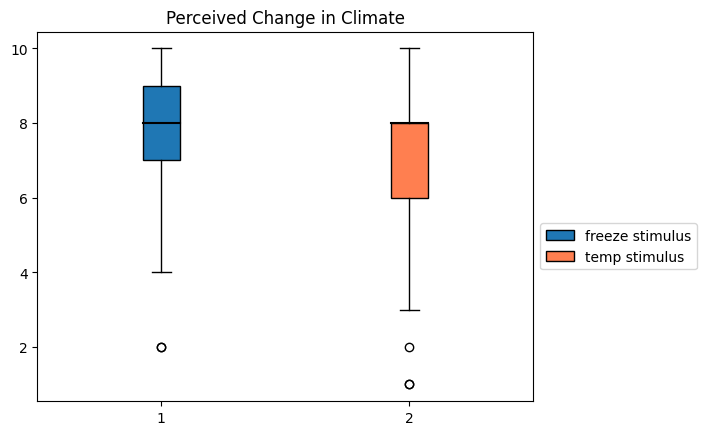

In [33]:
bp1 = plt.boxplot(exp_freeze_df['Climate'], positions=[1], patch_artist=True, boxprops=dict(facecolor="tab:blue"), medianprops = dict(color = "black", linewidth = 1.5))
bp2 = plt.boxplot(exp_temp_df['Climate'], positions=[2], patch_artist=True, boxprops=dict(facecolor="coral"), medianprops = dict(color = "black", linewidth = 1.5))
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['freeze stimulus', 'temp stimulus'],  bbox_to_anchor=(1, 0.5))
plt.title('Perceived Change in Climate')

C:\Users\grace\AppData\Local\Temp\ipykernel_22584\1334726928.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


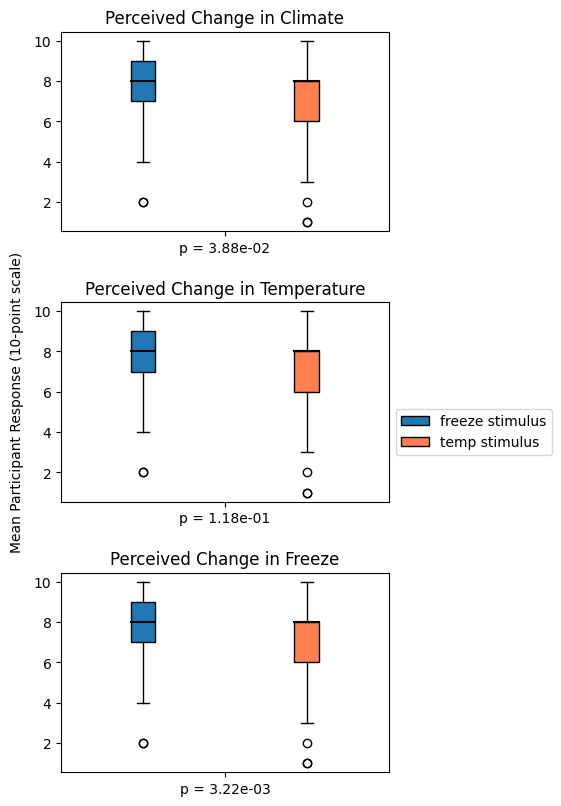

In [34]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(3, figsize = (4, 8))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    mean_diff_freeze = exp_freeze_df[cat].mean()
    stderr_freeze = exp_freeze_df[cat].sem()
    mean_diff_temp = exp_temp_df[cat].mean()
    stderr_temp = exp_temp_df[cat].sem()
    p_value = stats.ttest_ind(exp_freeze_df[cat], exp_temp_df[cat])[1]
    
    bp1 = axs[i].boxplot(exp_freeze_df['Climate'], positions=[1], patch_artist=True, boxprops=dict(facecolor="tab:blue"), medianprops = dict(color = "black", linewidth = 1.5))
    bp2 = axs[i].boxplot(exp_temp_df['Climate'], positions=[2], patch_artist=True, boxprops=dict(facecolor="coral"), medianprops = dict(color = "black", linewidth = 1.5))
    axs[i].set_title('Perceived Change in ' + cat)
    axs[i].set_xticks((np.arange(1)+1.5), (('p = ' + '{:0.2e}'.format(p_value)),))
    
    i += 1
    
axs[1].legend([bp1["boxes"][0], bp2["boxes"][0]], ['freeze stimulus', 'temp stimulus'],  bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Participant Response (10-point scale)')

fig.show()

C:\Users\grace\AppData\Local\Temp\ipykernel_22584\3706444644.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


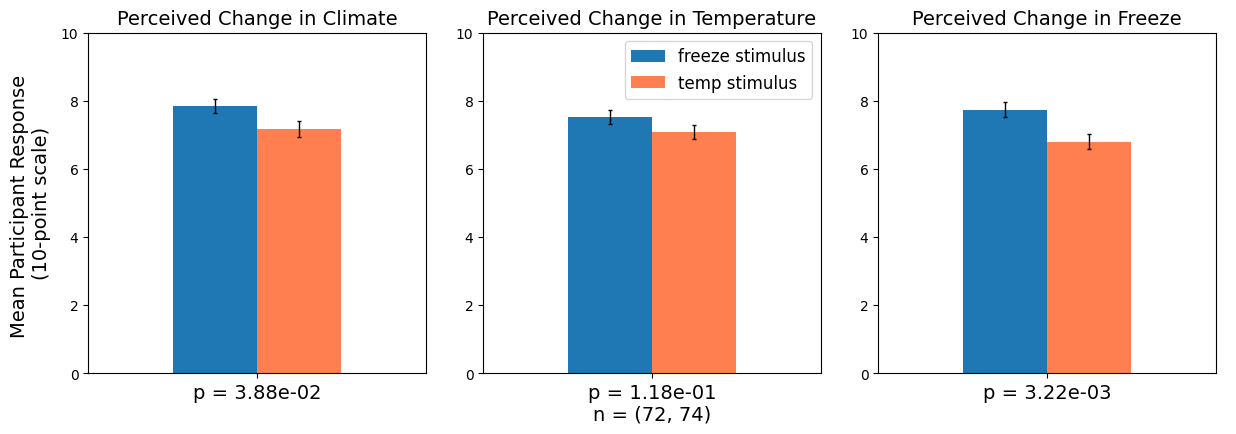

In [73]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    mean_diff_freeze = exp_freeze_df[cat].mean()
    stderr_freeze = exp_freeze_df[cat].sem()
    mean_diff_temp = exp_temp_df[cat].mean()
    stderr_temp = exp_temp_df[cat].sem()
    p_value = stats.ttest_ind(exp_freeze_df[cat], exp_temp_df[cat])[1]
    temp_sample_size = len(exp_temp_df[cat])
    freeze_sample_size = len(exp_freeze_df[cat])
    
    width = .25
    axs[i].bar(.375, mean_diff_freeze, width, color = "tab:blue", label = "freeze stimulus")
    axs[i].errorbar(0.375, mean_diff_freeze, yerr = stderr_freeze, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].bar(.625, mean_diff_temp, width, color = "coral", label = "temp stimulus")
    axs[i].errorbar(.625, mean_diff_temp, yerr = stderr_temp, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].set_title('Perceived Change in ' + cat, fontsize=14)
    axs[i].set_xticks((np.arange(1)+0.5), (('p = ' + '{:0.2e}'.format(p_value)),), fontsize=14)
    if i == 1:
        axs[i].set_xticks((np.arange(1)+0.5), (('p = ' + '{:0.2e}'.format(p_value)+ '\nn = (' + str(freeze_sample_size) + ", " + str(temp_sample_size) + ')'),), fontsize=14)
    axs[i].set_ylim(0,10)
    axs[i].set_xlim(0,1)
    i += 1
    
axs[1].legend(fontsize=12) #loc = 'lower center', bbox_to_anchor=(0.5, -0.4)
plt.ylabel('Mean Participant Response \n(10-point scale)', fontsize=14)

fig.show()